In [2]:
%qtconsole

In [1]:
%matplotlib qt

In [1]:
tritri_data = ['/media/kantundpeterpan/fast2/confinement/Project Peptidoglycan/Exp 18 - M1d5 M9 Tet10 hytolg replicate I/analysis_output/TriTri/molar/exp18_TriTri_rel_aggr.csv',
 '/media/kantundpeterpan/fast2/confinement/Project Peptidoglycan/Exp 3 - M1 deriv M9 minimal heavy to light/analysis_output/TriTri/molar/exp3_TriTri_rel_aggr.csv']

In [2]:
tettri_data = ['/media/kantundpeterpan/fast2/confinement/Project Peptidoglycan/Exp 18 - M1d5 M9 Tet10 hytolg replicate I/analysis_output/TetraTri/molar/exp18_TetTri_rel_aggr.csv',
 '/media/kantundpeterpan/fast2/confinement/Project Peptidoglycan/Exp 3 - M1 deriv M9 minimal heavy to light/analysis_output/TetraTri/molar/exp3_TetTri_rel_aggr.csv']

In [3]:
tritet_data = ['/media/kantundpeterpan/fast2/confinement/Project Peptidoglycan/Exp 18 - M1d5 M9 Tet10 hytolg replicate I/analysis_output/TriTetra/molar/exp18_TriTet_rel_aggr.csv',
 '/media/kantundpeterpan/fast2/confinement/Project Peptidoglycan/Exp 3 - M1 deriv M9 minimal heavy to light/analysis_output/TriTetra/molar/exp3_TriTet_rel_aggr.csv']

In [4]:
tettet_data = ['/media/kantundpeterpan/fast2/confinement/Project Peptidoglycan/Exp 18 - M1d5 M9 Tet10 hytolg replicate I/analysis_output/TetraTetra/molar/exp18_TetTet_rel_aggr_tg85.csv',
 '/media/kantundpeterpan/fast2/confinement/Project Peptidoglycan/Exp 3 - M1 deriv M9 minimal heavy to light/analysis_output/TetraTetra/molar/exp3_TetTet_rel_aggr.csv']

In [5]:
import matplotlib
import matplotlib.pyplot as plt

In [6]:
matplotlib.rc('font', **{'family':'serif'})
matplotlib.rcParams['text.usetex'] = True

In [7]:
import pandas as pd

In [8]:
tritri = {xp:pd.read_csv(f).set_index('sample')*100 for xp, f in zip(('xp18', 'xp3'), tritri_data)}

In [9]:
tettri = {xp:pd.read_csv(f).set_index('sample')*100 for xp, f in zip(('xp18', 'xp3'), tettri_data)}

In [10]:
tritet = {xp:pd.read_csv(f).set_index('sample')*100 for xp, f in zip(('xp18', 'xp3'), tritet_data)}

In [11]:
tettet = {xp:pd.read_csv(f).set_index('sample')*100 for xp, f in zip(('xp18', 'xp3'), tettet_data)}

In [12]:
for m in (tritri, tettri, tritet, tettet):
    zero = {key:0 for key in m['xp18'].columns}
    zero['Old'] = 100
    m['xp18'] = m['xp18'].append(pd.Series(zero, name = 0))

In [13]:
figsize = (4, 2.5)

linewidth=1

fontsize_x = 12
fontsize_y = 12

fontsize_ax_title = 15
x_ax_title = 10

markersize = 5

labelsize_xy = 12

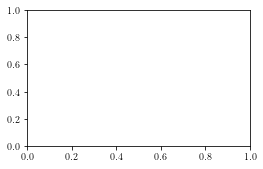

In [14]:
fig, axs = plt.subplots(figsize = figsize,
                        nrows = 1,
                        ncols = 1)

In [15]:
axs = [axs]

### Tet-Tri

In [16]:
tettri_total = pd.concat([tettri[k] for k in ('xp18', 'xp3')]).sort_index()

#### all heavy

In [17]:
tettri['xp18'].columns

Index(['Old', 'New', 'h2', 'Hybrid'], dtype='object')

In [18]:
tettri['xp18']['Old'].plot(
    ax = axs[0],
    linewidth = 0,
    marker = 'o',
    color = '#ff3333',
    markeredgecolor = 'k',
    zorder = 5,
    markersize = markersize
)

In [19]:
tettri['xp3']['Old'].plot(
    ax = axs[0],
    linewidth = 0,
    marker = 'o',
    color = (1,1,1,0.7),
    markeredgecolor = '#ff3333',
    zorder = 5,
    markersize = markersize
)

In [20]:
from scipy.interpolate import UnivariateSpline
import numpy as np

In [21]:
spl = UnivariateSpline(tettri_total.index, tettri_total['Old'], s=100)

In [22]:
xint = np.linspace(0,85, 200)

In [23]:
yint = spl(xint)

In [24]:
axs[0].plot(
    xint,
    yint,
    linestyle = '--',
    color = '#ff3333',
    zorder = 1
)

#### all light

In [25]:
tettri['xp18']['New'].plot(
    ax = axs[0],
    linewidth = 0,
    marker = 'o',
    color = '#9933ff',
    markeredgecolor = 'k',
    zorder = 5,
    markersize = markersize
)

In [26]:
tettri['xp3']['New'].plot(
    ax = axs[0],
    linewidth = 0,
    marker = 'o',
    color = (1, 1, 1, 0.7),
    markeredgecolor = '#9933ff',
    zorder = 5,
    markersize = markersize
)

In [27]:
from scipy.interpolate import UnivariateSpline
import numpy as np

In [28]:
spl = UnivariateSpline(tettri_total.index, tettri_total['New'], s=100)

In [29]:
xint = np.linspace(0,85, 200)

In [30]:
yint = spl(xint)

In [31]:
axs[0].plot(
    xint,
    yint,
    linestyle = '--',
    color = '#9933ff',
    zorder = 1
)

#### new-old

In [32]:
tettri['xp18']['Hybrid'].plot(
    ax = axs[0],
    linewidth = 0,
    marker = 'o',
    color = 'grey',
    markeredgecolor = 'k',
    zorder = 5,
    markersize = markersize
)

In [33]:
tettri['xp3']['Hybrid'].plot(
    ax = axs[0],
    linewidth = 0,
    marker = 'o',
    color = (1, 1, 1, 0.7),
    markeredgecolor = 'grey',
    zorder = 5,
    markersize = markersize
)

In [34]:
from scipy.interpolate import UnivariateSpline
import numpy as np

In [35]:
spl = UnivariateSpline(tettri_total.index, tettri_total['Hybrid'], s=100)

In [36]:
xint = np.linspace(0,85, 200)

In [37]:
yint = spl(xint)

In [38]:
axs[0].plot(
    xint,
    yint,
    linestyle = '--',
    color = 'grey',
    zorder = 1
)

### Layout

In [39]:
for ax in axs:
    for s in ('top', 'right'):
        ax.spines[s].set_visible(False)
    for label in ax.get_xticklabels():
        label.set_fontsize(labelsize_xy)
    for label in ax.get_yticklabels():
        label.set_fontsize(labelsize_xy)
    
    ax.minorticks_on()

In [40]:
xaxislabel = r'Time (min)'

In [41]:
yaxislabel = r'rel. abundance (\%)'

In [42]:
for ax in axs:
#     ax.set_title(title,
#                  horizontalalignment='left',
#                  x=0,
#                  y=1)
    ax.set_xlabel(xaxislabel, fontsize=labelsize_xy)
    ax.set_ylabel(yaxislabel, fontsize=labelsize_xy)

In [43]:
fig.tight_layout()

In [44]:
fig.savefig('timecourse_m15_tettri_aggr.svg')

In [45]:
# fig.savefig('fig6.png', dpi=300)